In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from acquire import get_df
from prepare import get_low_and_up_bounds_df
from datetime import timedelta, datetime
import requests


import warnings
warnings.filterwarnings('ignore')


# sns.relplot(x='x', y='y', col='dataset', data=df)
# df.groupby("dataset").describe()

In [2]:
# Acquire data
df = get_df()
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
# change the date to a datetime object and reset it as the index:
df.Date = pd.to_datetime(df.Date)

In [4]:
df = df.set_index('Date').sort_index()
df.head(2)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13


In [5]:
# create a month column:
df['Month'] = df.index.month_name()

In [5]:
df.head(2)

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
1/1/17,Sunday,27.0,2.00,15,0.5,10
1/10/17,Tuesday,43.4,1.05,33,0.5,18


In [6]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [7]:
# start with visualizations:
# histograms, box plots, scatter plots

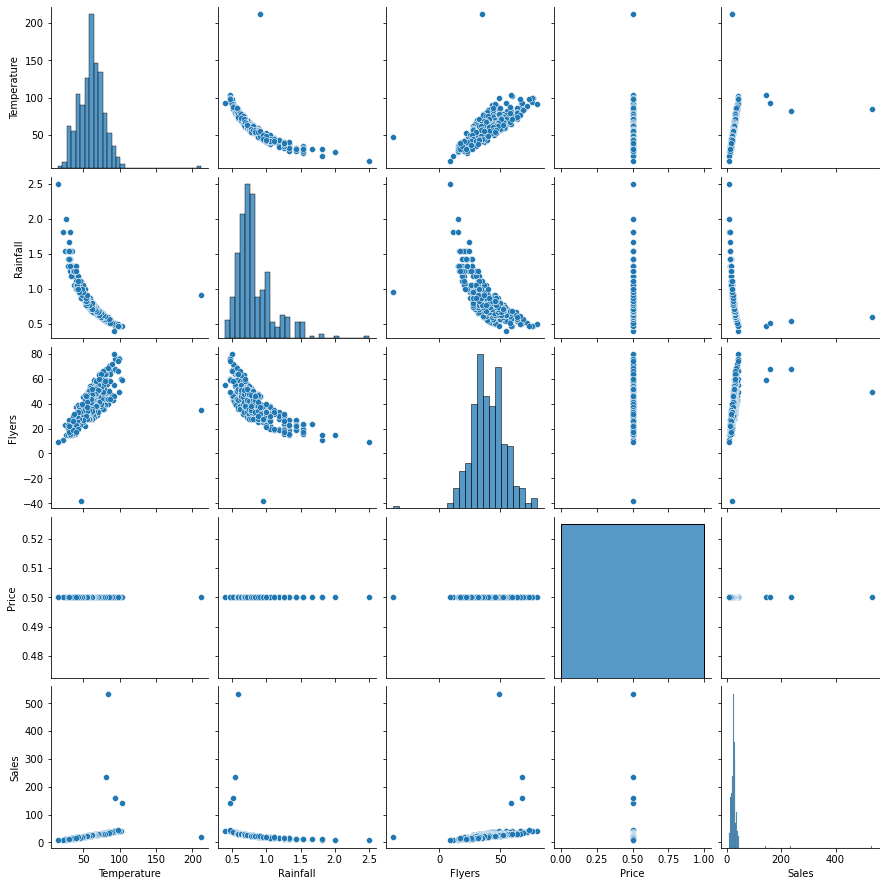

In [8]:
sns.pairplot(df)

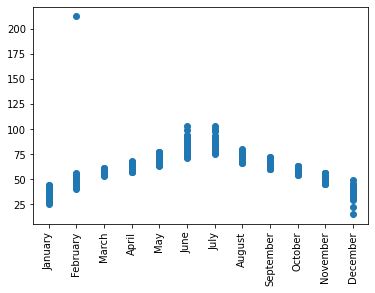

In [9]:
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation=90)
plt.show()

Day


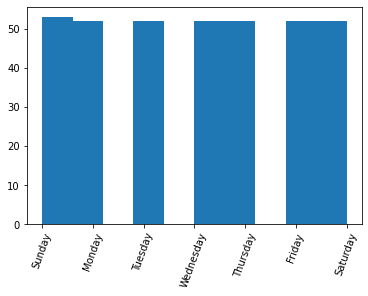

Temperature


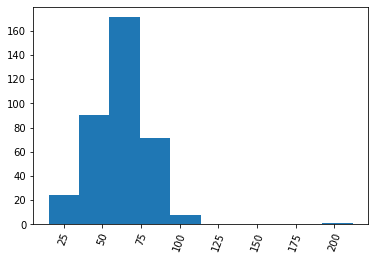

Rainfall


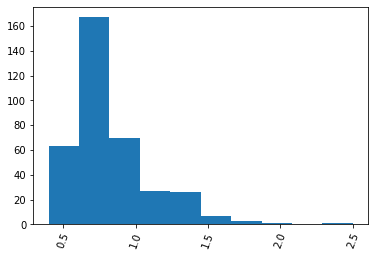

Flyers


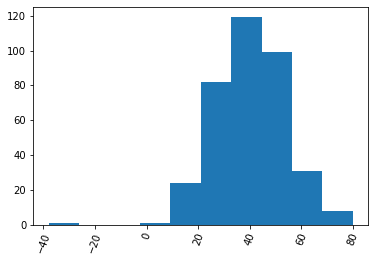

Price


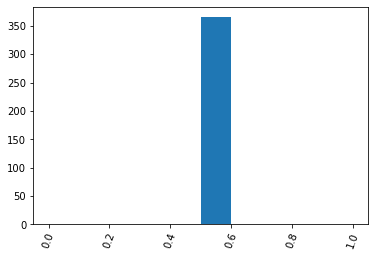

Sales


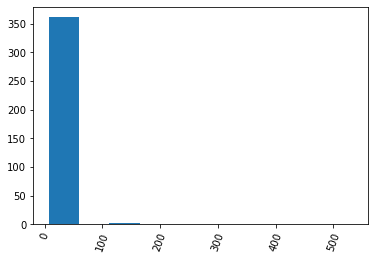

Month


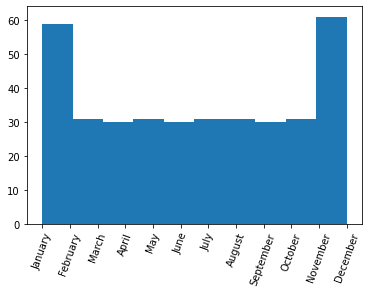

In [10]:
# histograms per column
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.xticks(rotation=70)
    plt.show()

<AxesSubplot:xlabel='Temperature'>

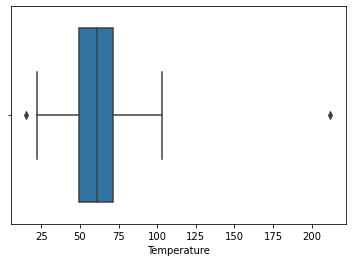

In [11]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Rainfall'>

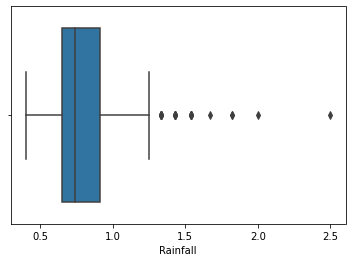

In [12]:
sns.boxplot(df['Rainfall'])

<AxesSubplot:xlabel='Flyers'>

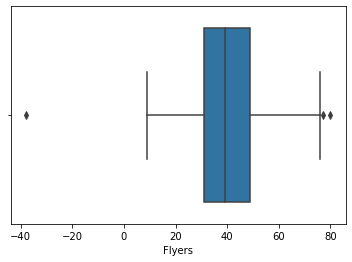

In [13]:
sns.boxplot(df['Flyers'])

<AxesSubplot:xlabel='Sales'>

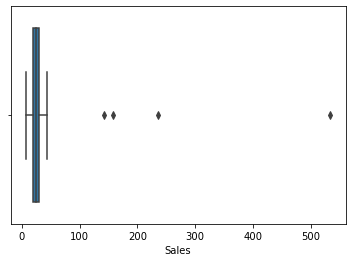

In [14]:
sns.boxplot(df['Sales'])

In [15]:
# boxplots will better show the outliers

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [16]:
def get_upper_and_lower_bounds(col, mult=1.5):
    '''
    positional argument: col, a pandas Series
    kwarg: mult: float value representing multiplier in tukey IQR boundaries
    
    return: lower_bound, upper_bound, two float values representing the fence values of our IQR based boundaries
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr * mult
    upper_bound = q3 + iqr * mult
    return lower_bound, upper_bound

In [17]:
get_upper_and_lower_bounds(df['Rainfall'])

(0.26, 1.3)

### 1. Using lemonade.csv dataset and focusing on continuous variables:

 * Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

 * Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [18]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_upper_and_lower_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------\n')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------

 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------

 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------

 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------

 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------



In [19]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [20]:
[print('\n~~~~~~~~~~~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]


~~~~~~~~~~~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February
2017-12-31    Sunday         15.1      2.50       9    0.5      7  December

~~~~~~~~~~~~~~~~~~~~
 Rainfall :
                   Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                        
2017-01-01     Sunday         27.0      2.00      15    0.5     10   January
2017-01-02     Monday         28.9      1.33      15    0.5     13   January
2017-01-03    Tuesday         34.5      1.33      27    0.5     15   January
2017-01-06     Friday         25.3      1.54      23    0.5     11   January
2017-01-07   Saturday         32.9      1.54      19    0.5     13   January
2017-01-11  Wednesday         32.6      1.54      23    0.5     12   January
2017-01

[None, None, None, None, None]

 * Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

 * Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [21]:
# at a multiplier of 3.0:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_upper_and_lower_bounds(df[col], mult=3.0)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------\n')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : -16.299999999999997
 Upper bound for Temperature: 137.7

-----------------

 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------

 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------

 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------

 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------



In [23]:
[print('\n~~~~~~~~~~~~~~~~~~~~\n', key, ':\n', outliers[key]['df'].to_markdown()) for key in outliers]


~~~~~~~~~~~~~~~~~~~~
 Temperature :
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |

~~~~~~~~~~~~~~~~~~~~
 Rainfall :
 | Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 | December |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 | December |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 | 

[None, None, None, None, None]

In [24]:
# takeaways:
# July 4th has exceptionally high sales, slightly suspect but plausible -- will check context for summer sales
# negative flier value needs to be fixed, does not make logical sense
#  2017-11-21
# day with exceptionally high temperature is beyond capacity for human survival, probably sus
# 2017-02-11

### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

 * Use a 2 sigma decision rule to isolate the outliers.
   * Do these make sense?
   * Should certain outliers be kept or removed?

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [ ]:
df.info()

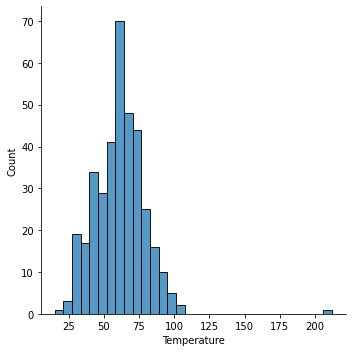

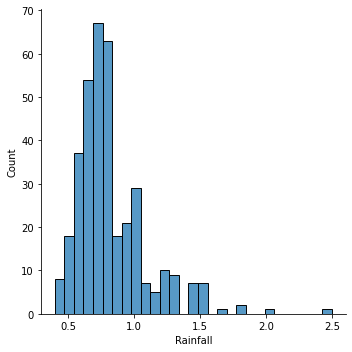

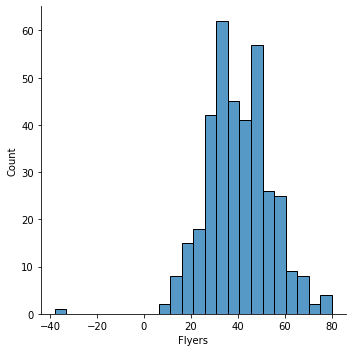

In [25]:
col_list = ['Temperature', 'Rainfall', 'Flyers']
for col in df[col_list]:
    sns.displot(df[col])

In [26]:
col_list= ["Temperature", "Rainfall", "Flyers"]
for col in col_list:
    df['z_score_'+ col] = (df[col] - df[col].mean()) / df[col].std()
    print(col)
    print(df[df['z_score_' + col].abs() > 3].to_markdown())
    print('-------\n')

Temperature
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |   z_score_Temperature |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|----------------------:|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |               8.33663 |
-------

Rainfall
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |   z_score_Temperature |   z_score_Rainfall |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|----------------------:|-------------------:|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 | January  |              -1.89234 |            4.28649 |
| 2017-01-16 00:00:00 | Monday  |          30.6 |       1.67 |       24 |     0.5 |      12 | January  |              -1.69329 |  

In [27]:
# things we will need to address/investigate:
# extreme temperature error value
# negative flyer error value

In [28]:
# negative flier value needs to be fixed, does not make logical sense
#  2017-11-21
# day with exceptionally high temperature is beyond capacity for human survival, probably sus
# 2017-02-11

In [29]:
# flyer problem: negative value

In [30]:
df.loc['2017-11-19':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,-0.294409,0.160748,-0.442762
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,-0.310997,0.160748,0.064983
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,-0.786506,0.452836,-5.665283
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,-0.692510,0.635391,-0.007552
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,-0.515576,0.160748,0.500194


In [31]:
#assessment suggests that the input of the data was clerical error
# fix: change the negative value to positive, presume real value is positive 38

In [32]:
df['Flyers'] = df.Flyers.abs()

In [35]:
df.loc['2017-11-19':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,-0.294409,0.160748,-0.442762
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,-0.310997,0.160748,0.064983
2017-11-21,Tuesday,47.0,0.95,38,0.5,20,November,-0.786506,0.452836,-5.665283
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,-0.692510,0.635391,-0.007552
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,-0.515576,0.160748,0.500194


In [36]:
df.loc['2017-02-08':'2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,-0.476872,0.160748,-0.660367
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,-1.024260,0.635391,-0.080087
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,-0.620631,0.306792,-0.007552
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,-0.310997,0.014704,0.064983
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,-0.819681,1.037012,-0.442762
2017-02-14,Tuesday,47.7,0.95,35,0.5,19,February,-0.747802,0.452836,-0.370227


In [37]:
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10']['Temperature']

In [38]:
df.loc['2017-02-08':'2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_Temperature,z_score_Rainfall,z_score_Flyers
Date,,,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,-0.476872,0.160748,-0.660367
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,-1.024260,0.635391,-0.080087
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,-0.620631,0.306792,-0.007552
2017-02-11,Saturday,50.0,0.91,35,0.5,21,February,8.336627,0.306792,-0.370227
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,-0.310997,0.014704,0.064983
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,-0.819681,1.037012,-0.442762
2017-02-14,Tuesday,47.7,0.95,35,0.5,19,February,-0.747802,0.452836,-0.370227


#### record: fixed erroneous temperature by assumig and imputing alue of 50 recorded on 2/10 to 2/11